**Q1. Ideal PFR: mean residence time and space time.** 

A gas-phase first-order reaction $A \rightarrow B+2C$ is carried out isothermally in an ideal PFR of $533 L$ volume with no pressure drop. The rate constant is $0.032 min^{-1}$, pure $A$ enters the reactor, $C_{A0} = 0.5 M$, $F_{A0}= 2 mol/min$. $80\%$ conversion is achieved in the reactor. Find mean residence time and space time. Explain the difference if any.

**Answer1**. 

Stoichiometric Table for $A \rightarrow B+2C$

|  .  | Initial  | Final         |
|:---:|---------:|--------------:|
|A    | $F_{A0}$ | $F_{A0}(1-X)$ |
|B    | 0        | $F_{A0}X$     |             
|C    | 0        | $2F_{A0}X$    |
|Total|$F_{A0}$  | $F_{A0}(1+2X)$|

$\frac{Q}{Q0}=\frac{F_T}{F_{T0}}=1+2X$

Space time: $\tau=\frac{V}{Q0}=\frac{V.C_{A0}}{F_{A0}}$

$-r_A=kC_A=k\frac{F_A}{Q}=k\frac{F_{A0}(1-X)}{Q_0(1+2X)}=k C_{A0}\frac{1-X}{1+2X}$

Mean residence time: $\bar{t}=\int_0^V \frac{dV}{Q}= F_{A0}\int_0^X \frac{dX}{-r_A.Q}=C_{A0}\int_0^X \frac{dX}{-r_A(1+\epsilon X)}$

$\bar{t}=C_{A0}\int_0^X \frac{(1+2X)dX}{k C_{A0}(1-X)(1+2X)}=\frac{1}{k}ln \frac{1}{1-X}$


In [86]:
import numpy as np
import math

V=533
CA0=0.5
FA0=2
k=0.032
X=0.8

Tau=V*CA0/FA0
Tbar=(1/k)*(math.log (1/(1-X)) )

print('Space time          =', Tau, 'min')
print('mean residence time =', "{0:.3f}".format(Tbar), 'min')
print('---------------------------------')
print('mean residence time < Space time because fluid expands')

Space time          = 133.25 min
mean residence time = 50.295 min
---------------------------------
mean residence time < Space time because fluid expands


**Q2. Ideal CSTR: mean residence time and space time.**

A liquid-phase reaction $A+2B\rightarrow C$ is carried out in a CSTR of $40 L$ volume. The feed is
stoichiometric, its volumetric flow rate $Q_0 = 200 L/h$. 45% conversion is achieved. Find mean residence time and space time. Explain the difference if any.

**Answer2**.
Space time: $\tau=\frac{V}{Q0}$

Mean residence time: $\bar{t}=\frac{V}{Q_{exit}}$

This reaction is happening in an incompressible fluid and it is assumed that the liquid phase does not have any density changes 

$Q_{exit}=Q_{0}$  and   $\bar{t}=\tau$

In [87]:
V=40   #L
Q0=200 #L/h


Tau=V/Q0

print('Space time', Tau, 'h')
print('---------------------------------')
print('In an incompressible fluid:    Space time = Mean residence time ')

Space time 0.2 h
---------------------------------
In an incompressible fluid:    Space time = Mean residence time 


**Q3.(Review of ChE 345)** 

A packed-bed reactor is to be designed to achieve $80\%$ conversion in a first-order constantdensity reaction. A research paper reports a PBR used for this reaction for the same feed composition and operating conditions except that $40\%$ conversion was achieved with $1 kg$ of catalyst. To double the conversion from the reported $40\%$ to the required $80\%$, how much catalyst mass is required? Assume that it is an ideal PBR (ideal PBR mole balance is the same as ideal PFR mole balance, except that catalyst mass W is used instead of reactor volume V.)

**Answer3**.

MB in a PBR:  $\frac{dF_A}{dW}=r_A$

Rate law: $r_A=kC_A$

Stoichiometry: $C_A=\frac{F_A}{Q}$
        for a constant density case: $C_A=\frac{F_{A0}(1-X)}{Q_0}$
        
Therefore: $\frac{dF_A}{dW}= k\frac{F_{A0}(1-X)}{Q_0}$

$F_{A0}\frac{dX}{dW}= k\frac{F_{A0}}{Q_0}(1-X)$

$ln (\frac{1}{1-X})=\frac{k}{Q_0}W$

$\frac{k}{Q_0}=ln (\frac{1}{1-X})/W$

$X=1-1/(e^{\frac{k}{Q_0}*W})$
Conversion does not increase linearly with $W$.

In [91]:
import numpy as np
import math

W=1 #kg
X=0.4

KQ0=(math.log(1/(1-X)))/W

print('k/Q0=', "{0:.3f}".format(KQ0), '1/kg')
print('-----------------')

k/Q0= 0.511 1/kg
-----------------


Text(0.5, 0, 'W, kg')

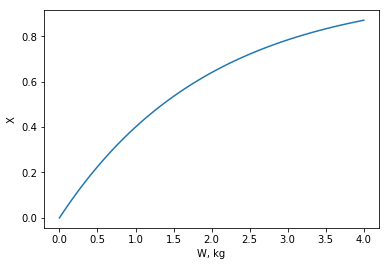

In [92]:
import math
import matplotlib.pyplot as plt

W=np.linspace(0.,4,100)
X=np.zeros(len(W))

for i in range(0,len(W)):
    X[i]=1-(1/math.exp(KQ0*W[i]))

plt.plot(W,X)
plt.ylabel('X')
plt.xlabel('W, kg')

In [99]:
from scipy.optimize import fsolve

X=0.8
def f(W):
    return W-(math.log(1/(1-X)))/KQ0

W = fsolve(f, 0.01)
f(W)

print ('To reach', X*100, '% conversion', W, 'kg catalyst is needed.')

To reach 80.0 % conversion [3.1506601] kg catalyst is needed.


**Q4. RTD characteristics.** 

RTD measurements were performed in a flow reactor with a liquid-phase reaction by a pulse tracer input. The outlet tracer concentration $(\mu mol/L)$ was measured and the equation
was fit, as shown on the Figure.

**4a)**. Provide the algebraic equation (with all evaluated constants except for $t$ to describe the RTD function $E(t)$. 

**4b)**. Calculate the value of cumulative distribution function $F(t)$ at $1 h$. What fraction of the material will leave the reactor after $1 hr$? 

**4c)**. Calculate mean residence time in this reactor (show the integration with intermediate steps; only numerical answer is not sufficient). 

**4d)**. Calculate variance of the RTD function. 

**4e)**. Assume if $50 μmol$ of the tracer was injected as a pulse input, and the liquid flow rate was constant at $20 L/h$. Using the provided Figure, calculate if all the tracer had left by $1.5 h$. Was it a wise decision to stop measurements at $1.5 h$?

![PFR.png](ChE445_HW1_Q4.png)

**Answer 4a)**.

$c(t)=-3t^2+4t\;\;\;$   at  $\;\;\;t=< 1.33 h$

$c(t)=0\;\;\;\;\;\;\;\;\;\;\;\;\;\;$   at  $\;\;\;t>1.33 h$

$\int_0^\infty c(t)dt=-3\int_0^{1.33}t^2dt+4\int_0^{1.33}dt=-\frac{3}{3}1.33^3+\frac{4}{2}1.33^2=1.185$ $(\mu M.h)$


1.185


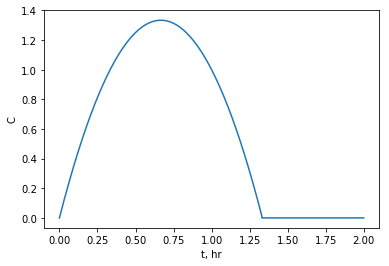

In [100]:
import numpy as np
import scipy.integrate as integrate

t=np.linspace(0.,2.,10000)
C=np.zeros(len(t))

for i in range(0,len(t)):
    if 0<t[i]<=1.33: 
        C[i]=-3*t[i]*t[i]+4*t[i]
    else:
        C[i]=0

plt.plot(t,C)
plt.ylabel('C')
plt.xlabel('t, hr')

I = integrate.cumtrapz(C, t, initial=0) 
print ("{0:.3f}".format(I[len(I)-1]))


$E(t)=\frac{c(t)}{\int_0^\infty c(t) dt}$

$E(t)=-2.53t^2+3.376t\;\;\;$   at  $\;\;\;t=< 1.33 h$

$E(t)=0\;\;\;\;\;\;\;\;\;\;\;\;\;\;$   at  $\;\;\;t>1.33 h$


Text(0.5, 0, 't, hr')

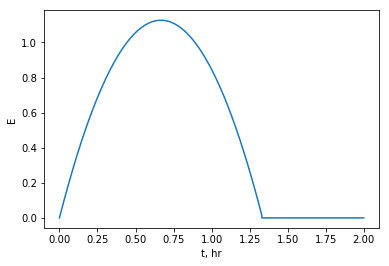

In [101]:
E=np.zeros(len(t))

for i in range(0,len(t)):
    if 0<t[i]<=1.33: 
        E[i]=-2.53*t[i]*t[i]+3.376*t[i]
    else:
        E[i]=0
plt.plot(t,E)
plt.ylabel('E')
plt.xlabel('t, hr')

**4b)** $F(t)=\int_0^t E(t) dt$

at 1 hr: $F(t)=-2.53\int_0^1 t^2dt+3.376\int_0^1t dt=0.845$

F at t=1 0.845
Fraction leaving after 1 hr 0.155


Text(0.5, 0, 't, hr')

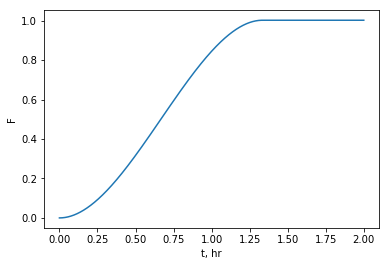

In [106]:
F = integrate.cumtrapz(E, t, initial=0) 
   
k2=0

for i in range(0,len(t)):
    if 0.99<t[i]<=1.0:
        k2=i

print ('F at t=1',"{0:.3f}".format(F[k2]))
print('Fraction leaving after 1 hr', "{0:.3f}".format(1-F[k2]))
        
plt.plot(t,F)
plt.ylabel('F')
plt.xlabel('t, hr')

**4c)**. Mean residence time

$$\bar{t}=\int_0^\infty tE(t)dt=-2.53\int_1^{1.33}t^3 dt+3.376\int_0^{1.33}t^2 dt=0.67 hr$$

0.668


Text(0.5, 0, 't, hr')

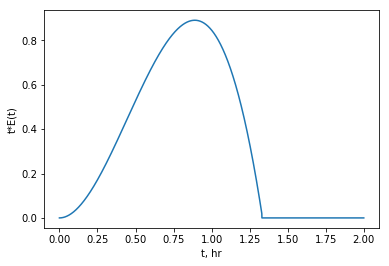

In [78]:
tE=np.multiply(t,E)

tr = integrate.cumtrapz(tE, t, initial=0) 
print ("{0:.3f}".format(tr[len(tr)-1]))

plt.plot(t,tE)
plt.ylabel('t*E(t)')
plt.xlabel('t, hr')

The inflection point of the parabola is at 0.67 hr

**4d)**. Varience.

$\sigma^2=\int_0^\infty t^2 E(t)dt-\bar{t}^2=-2.53\int_0^{1.33} t^4 dt+3.376\int_0^{1.33} t^3 dt-(0.67)^2$

$\sigma^2=-\frac{2.53}{5}*(1.33)^5+\frac{3.376}{4}(1.33)^4-(0.67)^2=0.09 h^2$

In [80]:
v=np.zeros(len(t))

for i in range(0,len(t)):
    v[i]=t[i]*t[i]*E[i]
    

Va = integrate.trapz(v, t)

Var1=Va-(tr[len(tr)-1]*tr[len(tr)-1])
print ("{0:.3f}".format(Var1), 'min^2')

0.088 min^2


**4e)**. The area under the curve represents the tracer left. 

In **a)** we found it as $1.185 \mu mol.h/L$.

Total amount of exited tracer $= C_{out}*Q=1.185*20=23.7 \mu mol$.

$50 \mu mol$ is injected and not all tracer have left by $1.5 h$. 

We have to continue measurements and redo all calculations for $\bar{t}$ and $\sigma^2$ .